In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def df(x):
    return np.array([4*x[0]*(x[0]**2+x[1]-11) + 2*(x[0]+x[1]**2-7),
                     2*(x[0]**2+x[1]-11) + 4*x[1]*(x[0]+x[1]**2-7)])

In [ ]:
import sympy

def derivative(func_str, var_str):
    # Создаем символьную функцию из строки
    func = sympy.sympify(func_str)
    # Создаем символьную переменную из строки
    var = sympy.symbols(var_str)
    # Берем производную функции по переменной
    deriv = sympy.diff(func, var)
    # Преобразуем результат в строку и заменяем точки на запятые
    return str(deriv).replace('.', ',')

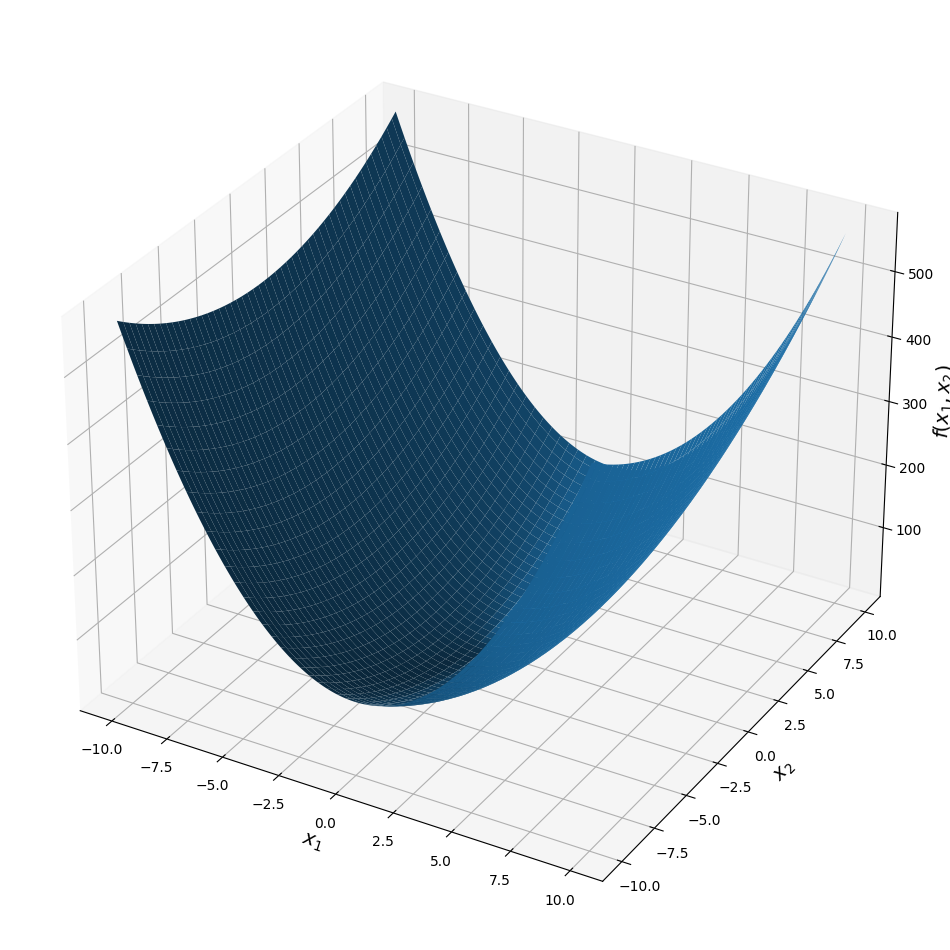

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

#Определяем функцию двух переменных
#Himmelblau
#user_string1="(x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2"

#OUR
user_string2="(4.70*x1**2) + (1.06*x2**2) + (0.30*x2) + (0.39)"

f1 = derivative(user_string2, 'x1')
f2 = derivative(user_string2, 'x2')
func = lambda x1, x2: eval(user_string2)
funcx1 = lambda x1,x2 : eval(derivative(user_string2, 'x1').replace(',', '.'))
funcx2 = lambda x1,x2 : eval(derivative(user_string2, 'x2').replace(',', '.'))


#Задаем массив значений 
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)

#Создаем сетки X1 и X2, представляющие собой матрицы всех возможных комбинаций значений из массивов 
X1, X2 = np.meshgrid(x1, x2)
#Вычисляем значения функции для всех пар значений из сеток X1 и X2
f = func(X1, X2)
fig = plt.figure(figsize=(12, 18)) # устанавливаем размер фигуры
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, f)
ax.set_xlabel(r'$x_1$', fontsize=14, weight='bold')
ax.set_ylabel(r'$x_2$',  fontsize=14, weight='bold')
ax.set_zlabel(r'$f(x_1, x_2)$',  fontsize=14, weight='bold')
plt.show()

# **Градиентный спуск:** 

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Определяем функцию градиента
def gradient(x1, x2):
    return np.array([funcx1(x1, x2), funcx2(x1, x2)])

# Определяем метод градиентного спуска
def gradient_descen(start_point, learning_rate, num_iterations):
    # Создаем список для хранения значений функции на каждой итерации
    f_values = []
    # Добавляем начальную точку в список
    f_values.append(start_point)
    # Начинаем итерации
    for i in range(num_iterations):
        # Получаем текущую точку
        current_point = f_values[-1]
        # Вычисляем градиент в текущей точке
        grad = gradient(current_point[0], current_point[1])
        # Вычисляем новую точку
        new_point = current_point - learning_rate * grad
        # Добавляем новую точку в список
        f_values.append(new_point)
    # Возвращаем список значений функции на каждой итерации
    return f_values

In [ ]:
from tabulate import tabulate

# Определяем начальную точку, скорость обучения и количество итераций
start_point = np.array([-5, 5])
learning_rate = 0.01
num_iterations = 10

# Вычисляем значения для таблицы
table_values = []
for i, point in enumerate(gradient_descen(start_point, learning_rate, num_iterations)):
    x1, x2 = point
    current_point = np.array([x1, x2])
    grad = gradient(x1, x2)
    new_point = current_point - learning_rate * grad
    table_values.append([i, x1, current_point, grad, new_point])

# Печатаем таблицу
print(tabulate(table_values, headers=['Iteration', 'x1', 'x2', 'current_point', 'grad', 'new_point']))

  Iteration                x1  x2                                 current_point                        grad
-----------  ----------------  ---------------------------------  -----------------------------------  ---------------------------------
          0      -5            [-5  5]                            [145.89 -36.1 ]                      [-6.4589  5.361 ]
          1      -6.4589       [-6.4589  5.361 ]                  [228.53476955 -49.04834   ]          [-8.7442477  5.8514834]
          2      -8.74425      [-8.7442477  5.8514834]            [397.81047295 -69.49078353]          [-12.72235242   6.54639124]
          3     -12.7224       [-12.72235242   6.54639124]        [ 808.51425063 -105.41176338]        [-20.80749493   7.60050887]
          4     -20.8075       [-20.80749493   7.60050887]        [2098.77762481 -179.17737355]        [-41.79527118   9.3922826 ]
          5     -41.7953       [-41.79527118   9.3922826 ]        [8306.88561253 -372.66390996]        [-124.86412

<ipython-input-39-a526126f703c>:18: RuntimeWarning: overflow encountered in double_scalars
  return (4.70*x1**2) + (1.06*x2**2) + (0.30*x2) + (0.39)
<ipython-input-39-a526126f703c>:21: RuntimeWarning: invalid value encountered in double_scalars
  return (9.4*x1) + (2.12*x2) + (0.30)


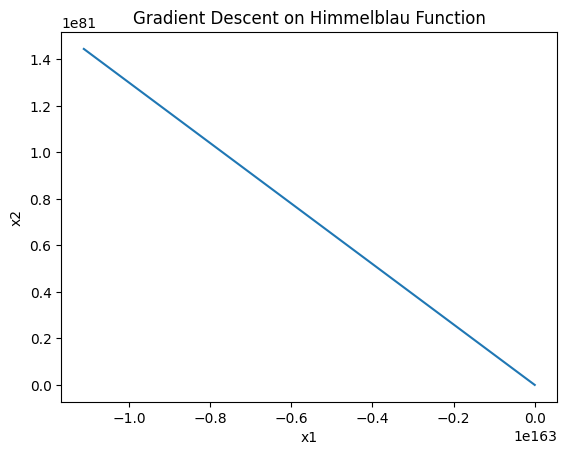

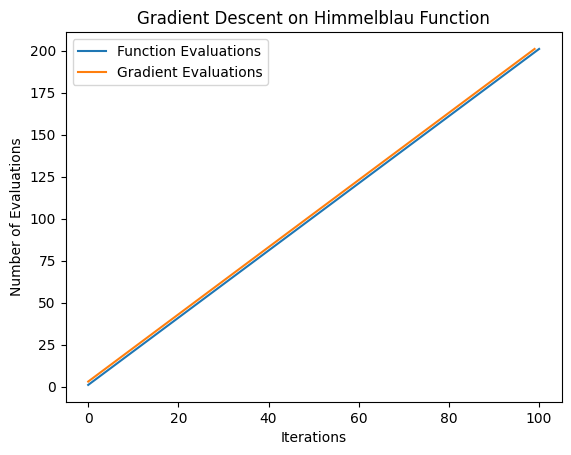

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры метода градиентного спуска
start_point = np.array([9, 8])
learning_rate = 0.01
num_iterations = 100

# Задаем функции Химмельблау
#def funcx1(x1, x2):
#    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

#def funcx2(x1, x2):
#    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# Задаем нашу функцию
def funcx1(x1, x2):
    return (4.70*x1**2) + (1.06*x2**2) + (0.30*x2) + (0.39)

def funcx2(x1, x2):
    return (9.4*x1) + (2.12*x2) + (0.30)

# Определяем метод градиентного спуска
def gradient(x1, x2):
    return np.array([funcx1(x1, x2), funcx2(x1, x2)])

def gradient_descent(start_point, learning_rate, num_iterations):
    # Создаем список для хранения значений функции и количества вычислений на каждой итерации
    f_values = []
    f_evaluations = []
    # Добавляем начальную точку в список
    f_values.append(start_point)
    f_evaluations.append(1)
    # Начинаем итерации
    for i in range(num_iterations):
        # Получаем текущую точку
        current_point = f_values[-1]
        # Вычисляем градиент в текущей точке
        grad = gradient(current_point[0], current_point[1])
        # Считаем количество вычислений функции и ее градиента
        evaluations = f_evaluations[-1] + 2
        # Вычисляем новую точку
        new_point = current_point - learning_rate * grad
        # Добавляем новую точку и количество вычислений в списки
        f_values.append(new_point)
        f_evaluations.append(evaluations)
    # Возвращаем списки значений и количества вычислений на каждой итерации
    return f_values, f_evaluations

# Запускаем метод градиентного спуска
f_values, f_evaluations = gradient_descent(start_point, learning_rate, num_iterations)

# Построим график изменения значений функции
f_values = np.array(f_values)
fig, axs = plt.subplots()
axs.plot(f_values[:,0], f_values[:,1])
axs.set_xlabel('x1')
axs.set_ylabel('x2')
axs.set_title('Gradient Descent on Himmelblau Function')

# Построим график изменения количества вычислений функции и ее градиента

plt.figure()
plt.plot(f_evaluations, label='Function Evaluations')
plt.plot(f_evaluations[1:], label='Gradient Evaluations')
plt.xlabel('Iterations')
plt.ylabel('Number of Evaluations')
plt.title('Gradient Descent on Himmelblau Function')
plt.legend()
plt.show()

<ipython-input-42-3032b77decc6>:79: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_values, y_values, '-bo', color='red', label='Gradient Descent with Line Search')


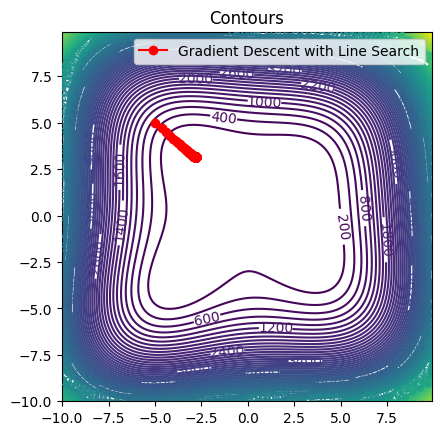

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию Химмельблау
def func(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Определяем функции градиента для x и y
def gradx(x, y):
    return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)

def grady(x, y):
    return 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)

# Определяем нашу функцию 
#def func(x, y):
#    return (4.70*x1**2) + (1.06*x2**2) + (0.30*x2) + (0.39)

# Определяем функции градиента для x и y
#def gradx(x, y):
#    return (9.4*x)

#def grady(x, y):
#    return (2.12*y) + (0.30)

# Определяем метод градиентного спуска с дроблением шага
def gradient_descent(start_point, learning_rate, num_iterations, eta):
    # Создаем список для хранения значений функции на каждой итерации
    f_values = []
    # Добавляем начальную точку в список
    f_values.append(start_point)
    # Начинаем итерации
    for i in range(num_iterations):
        # Получаем текущую точку
        current_point = f_values[-1]
        # Вычисляем градиент в текущей точке
        grad = np.array([gradx(current_point[0], current_point[1]), grady(current_point[0], current_point[1])])
        # Вычисляем новую точку
        new_point = current_point - learning_rate * grad
        # Вычисляем новый шаг
        step = learning_rate
        while func(new_point[0], new_point[1]) > func(current_point[0], current_point[1]) - eta * step * np.linalg.norm(grad)**2:
            step = step / 2.0
            new_point = current_point - step * grad
        # Добавляем новую точку в список
        f_values.append(new_point)
    # Возвращаем список значений функции на каждой итерации
    return f_values

# Задаем интервал для построения графика
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

# Создаем сетку
X, Y = np.meshgrid(x, y)

# Вычисляем значения функции Химмельблау на сетке
Z = func(X, Y)

# Строим график с линиями уровня
fig, ax = plt.subplots()
ax.set_aspect('equal')
cs = ax.contour(X, Y, Z, 100)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Contours')

# Определяем начальную точку и запускаем метод градиентного спуска с дроблением шага
start_point = np.array([-5, 5])
learning_rate = 0.001
num_iterations = 1000
eta = 0.5
f_values = gradient_descent(start_point, learning_rate, num_iterations, eta)

# Получаем значения координат x и y из списка значений функции
x_values = [point[0] for point in f_values]
y_values = [point[1] for point in f_values]

# Строим график траектории метода градиентного спуска
ax.plot(x_values, y_values, '-bo', color='red', label='Gradient Descent with Line Search')
plt.legend()
plt.show()

## **Градиентный спуск с дроблением шага:**

---



In [ ]:
def armijo_rule(f, df, x_k, d_k, alpha=1, c=0.1, tau=0.5):
    while f(x_k + alpha * d_k) > f(x_k) + c * alpha * np.dot(df(x_k), d_k):
        alpha *= tau
    return alpha

def armijo_gradient_descent(f, df, x_0, max_iter=1000, eps=1e-5):
    x_k = x_0
    f_values = [f(x_k)]
    grad_count = [1]
    for i in range(max_iter):
        d_k = -df(x_k)
        alpha = armijo_rule(f, df, x_k, d_k)
        x_next = x_k + alpha * d_k
        f_values.append(f(x_next))
        grad_count.append(grad_count[-1] + 1)
        if np.linalg.norm(x_next - x_k) < eps:
            break
        x_k = x_next
    return x_k, f_values, grad_count

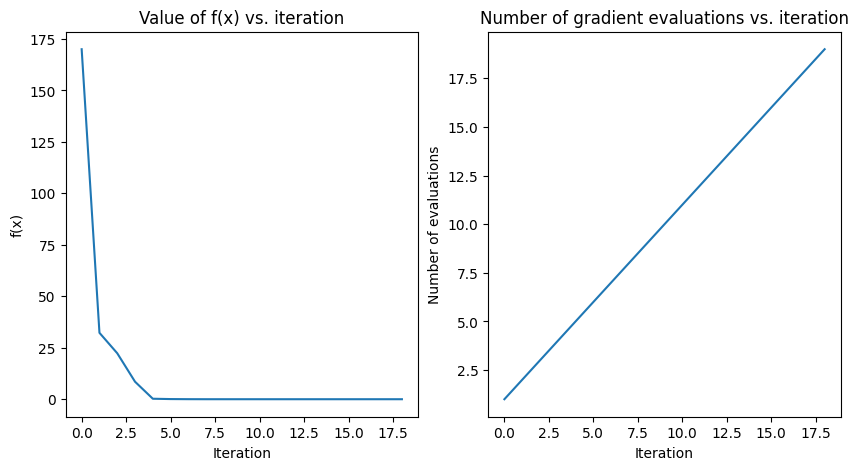

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def df(x):
    return np.array([4*x[0]*(x[0]**2+x[1]-11) + 2*(x[0]+x[1]**2-7),
                     2*(x[0]**2+x[1]-11) + 4*x[1]*(x[0]+x[1]**2-7)])

def armijo_rule(f, df, x_k, d_k, alpha=1, c=0.1, tau=0.5):
    while f(x_k + alpha * d_k) > f(x_k) + c * alpha * np.dot(df(x_k), d_k):
        alpha *= tau
    return alpha

def armijo_gradient_descent(f, df, x_0, max_iter=1000, eps=1e-5):
    x_k = x_0
    f_values = [f(x_k)]
    grad_count = [1]
    for i in range(max_iter):
        d_k = -df(x_k)
        alpha = armijo_rule(f, df, x_k, d_k)
        x_next = x_k + alpha * d_k
        f_values.append(f(x_next))
        grad_count.append(grad_count[-1] + 1)
        if np.linalg.norm(x_next - x_k) < eps:
            break
        x_k = x_next
    return x_k, f_values, grad_count

x_0 = np.array([0, 0])
x_min, f_values, grad_count = armijo_gradient_descent(f, df, x_0)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(f_values)
plt.title('Value of f(x) vs. iteration')
plt.xlabel('Iteration')
plt.ylabel('f(x)')

plt.subplot(122)
plt.plot(grad_count)
plt.title('Number of gradient evaluations vs. iteration')
plt.xlabel('Iteration')
plt.ylabel('Number of evaluations')
plt.show()

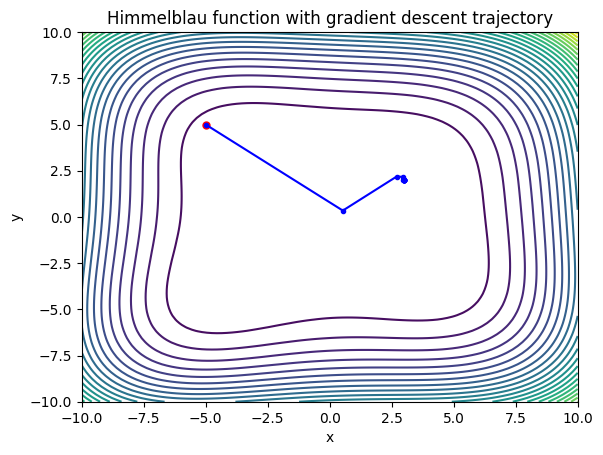

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def armijo_rule(f, df, x_k, d_k, alpha=1, c=0.1, tau=0.5):
    while f(x_k + alpha * d_k) > f(x_k) + c * alpha * np.dot(df(x_k), d_k):
        alpha *= tau
    return alpha

def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

def himmelblau_grad(x):
    grad = np.zeros_like(x)
    grad[0] = 4 * x[0] * (x[0] ** 2 + x[1] - 11) + 2 * (x[0] + x[1] ** 2 - 7)
    grad[1] = 2 * (x[0] ** 2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1] ** 2 - 7)
    return grad

x_min, x_max = -10, 10
y_min, y_max = -10, 10
n_points = 100
init_point = np.array([-5, 5])

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)
Z = himmelblau(np.array([X, Y]))

plt.figure()
plt.contour(X, Y, Z, levels=30)
plt.plot(init_point[0], init_point[1], marker='o', markersize=5, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Himmelblau function with gradient descent trajectory")

trajectory = [init_point]
x_k = init_point.copy()
for i in range(150):
    d_k = -himmelblau_grad(x_k)
    alpha = armijo_rule(himmelblau, himmelblau_grad, x_k, d_k)
    x_next = x_k + alpha * d_k
    trajectory.append(x_next)
    if np.linalg.norm(x_next - x_k) < 1e-5:
        break
    x_k = x_next

trajectory = np.array(trajectory)
plt.plot(trajectory[:,0], trajectory[:,1], '-bo', markersize=3)
plt.show()